___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
df = pd.read_csv("KNN_Project_Data")

**Check the head of the dataframe.**

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

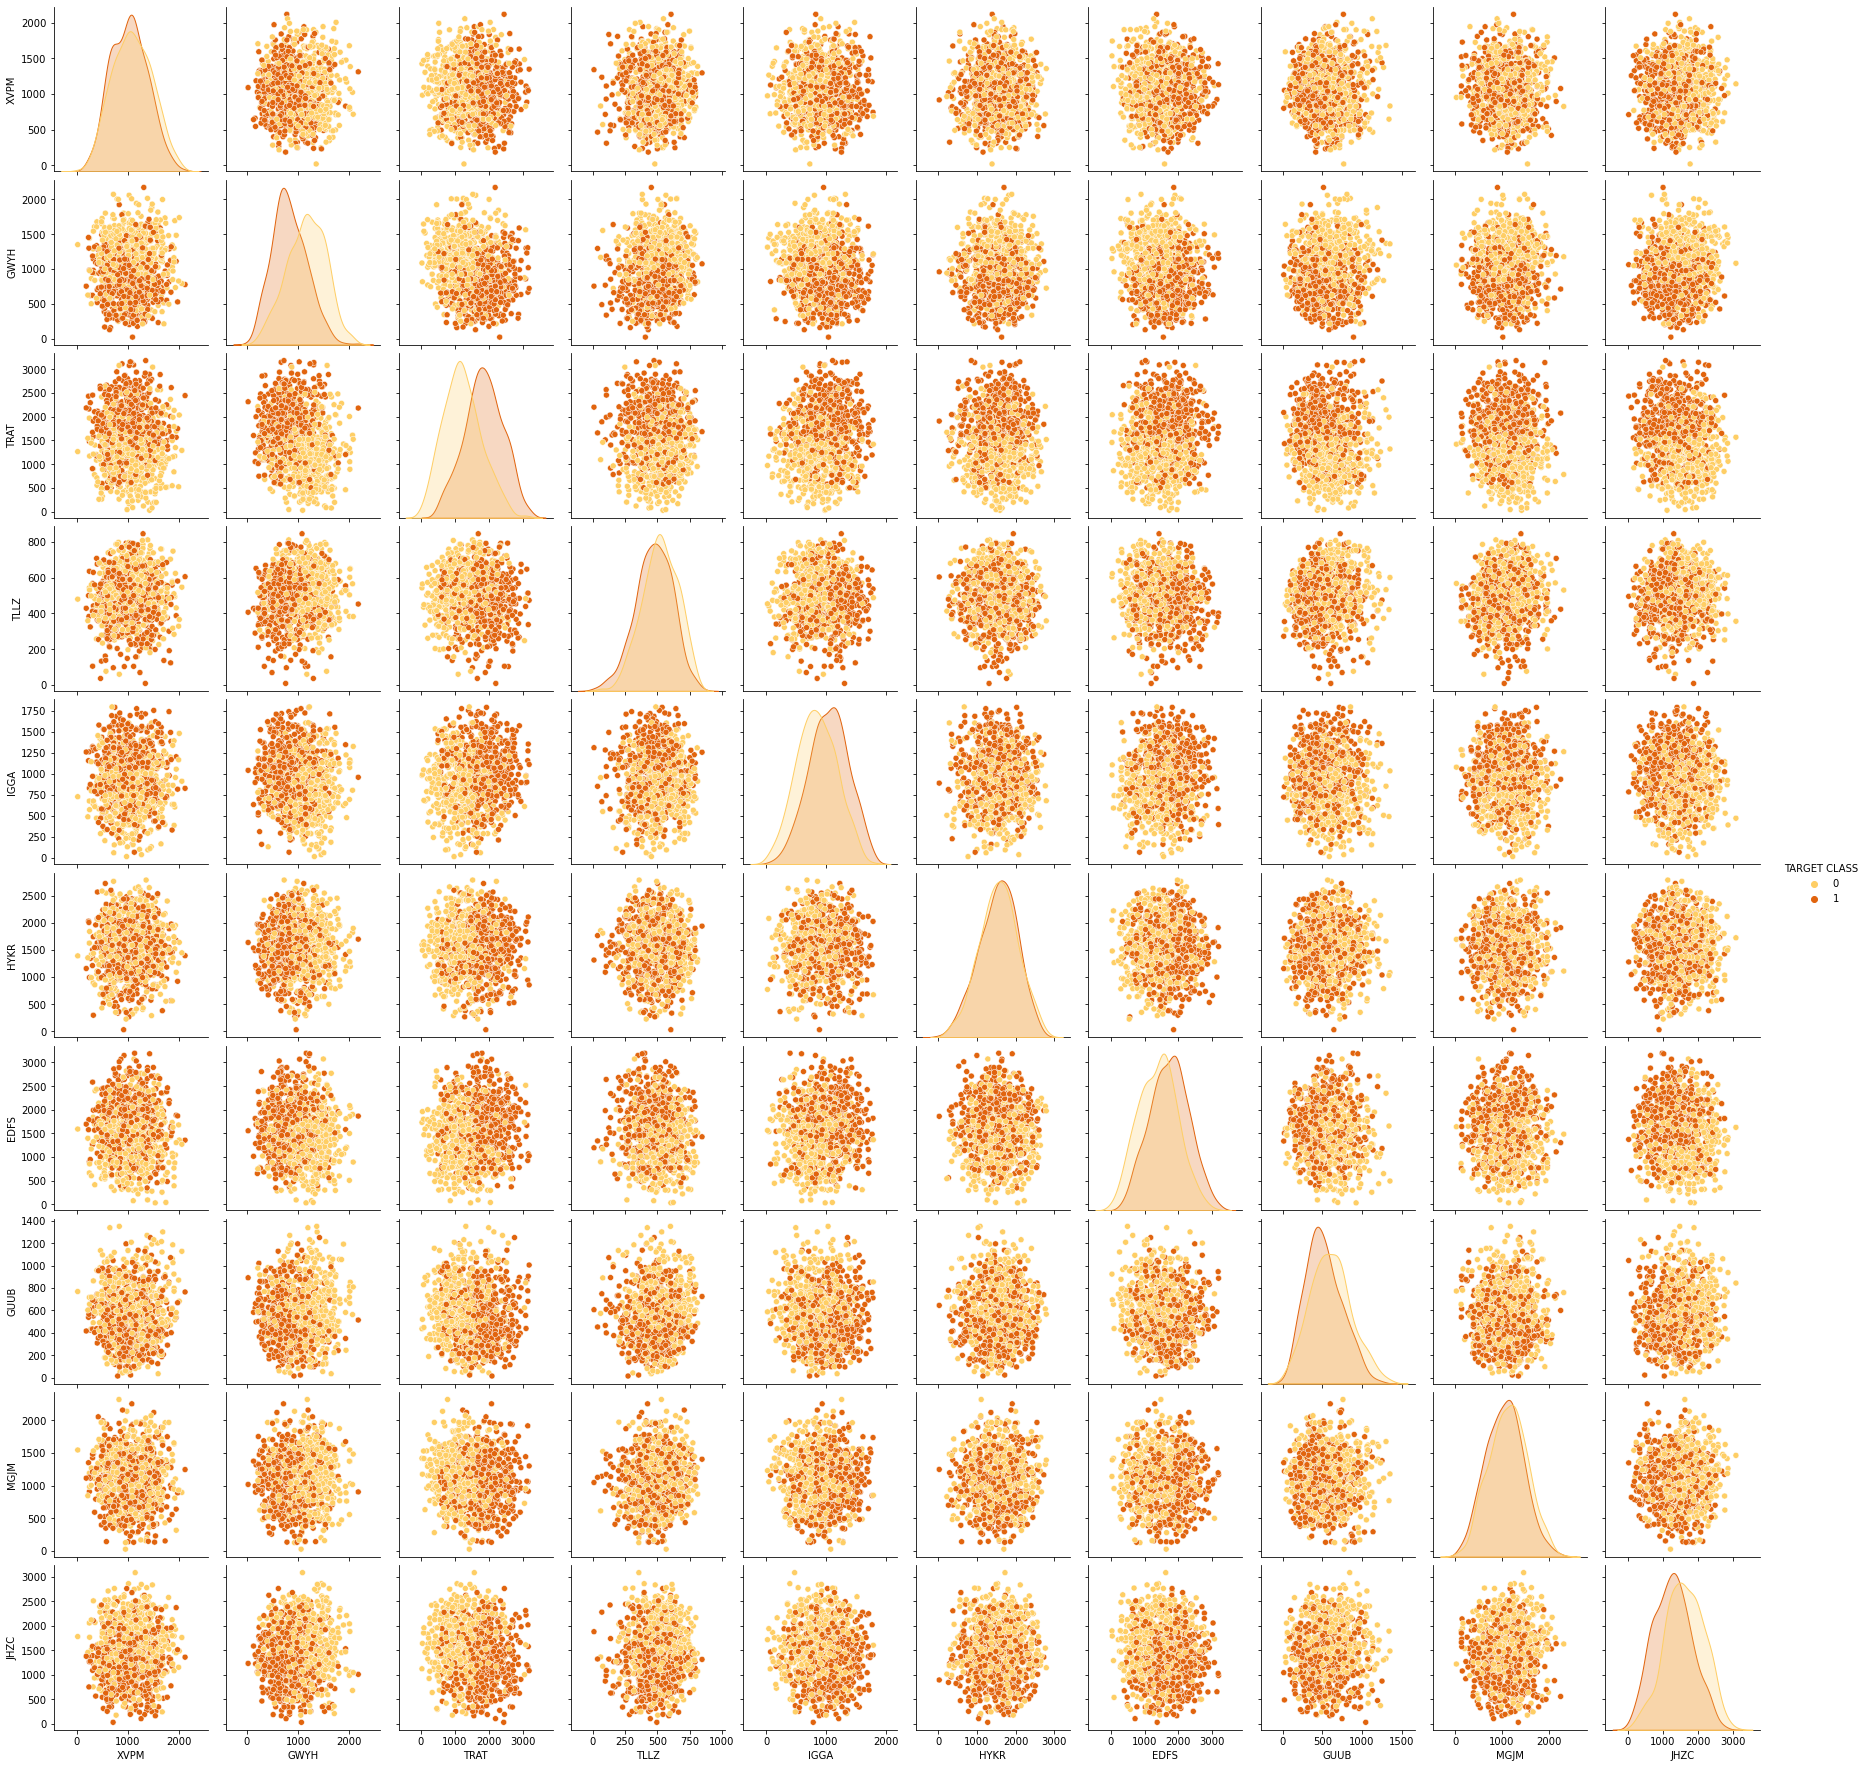

In [6]:
sns.pairplot(df, hue="TARGET CLASS", palette="YlOrBr")

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [7]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [8]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [11]:
scaler.fit(df.drop("TARGET CLASS", axis = 1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [15]:
scaled_features = pd.DataFrame(scaler.transform(df.drop("TARGET CLASS", axis = 1)))
scaled_features.head()

,0,1,2,3,4,5,6,7,8,9
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [16]:
y = df["TARGET CLASS"]
X = scaled_features

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [18]:
KNN = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [19]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [20]:
y_pred = KNN.predict(X_test)

** Create a confusion matrix and classification report.**

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

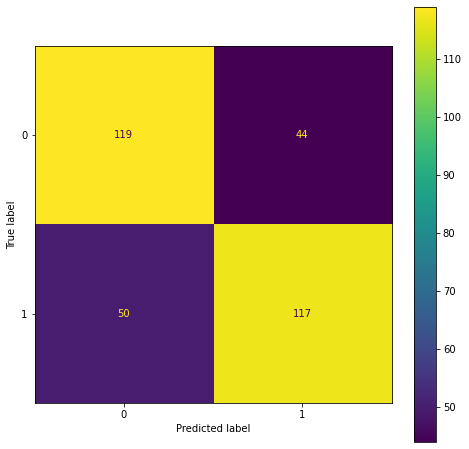

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
disp.figure_.set_size_inches(8, 8, forward = True)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [27]:
def error_K(K):
    KNN = KNeighborsClassifier(n_neighbors=K)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    return sum(y_pred != y_test)

er_k = [error_K(K) for K in range(1, 101)]
er_k

[94,
 89,
 76,
 79,
 73,
 69,
 65,
 63,
 60,
 65,
 64,
 63,
 59,
 57,
 55,
 57,
 60,
 57,
 56,
 57,
 58,
 59,
 58,
 57,
 58,
 58,
 55,
 56,
 55,
 55,
 55,
 56,
 54,
 56,
 58,
 60,
 59,
 59,
 55,
 59,
 57,
 58,
 57,
 57,
 55,
 57,
 56,
 57,
 58,
 58,
 57,
 58,
 56,
 57,
 55,
 58,
 54,
 55,
 52,
 53,
 52,
 56,
 55,
 56,
 52,
 56,
 55,
 57,
 54,
 58,
 52,
 57,
 51,
 54,
 50,
 53,
 51,
 51,
 48,
 53,
 51,
 52,
 51,
 50,
 49,
 49,
 47,
 50,
 52,
 51,
 51,
 51,
 48,
 48,
 49,
 48,
 49,
 49,
 50,
 50]

**Now create the following plot using the information from your for loop.**

Text(0.5, 1.0, 'Error rate vs K')

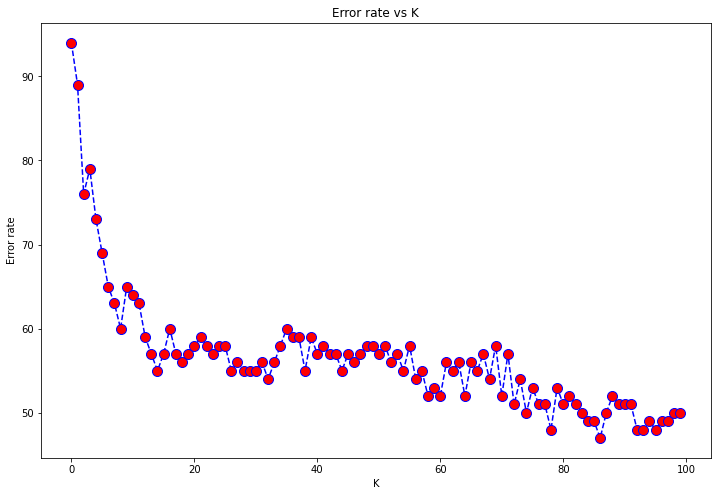

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(er_k, ls="--",c= "blue", marker = "o", markerfacecolor = "red", markersize=10)
plt.ylabel("Error rate")
plt.xlabel("K")
plt.title("Error rate vs K")

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       163
           1       0.85      0.87      0.86       167

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330



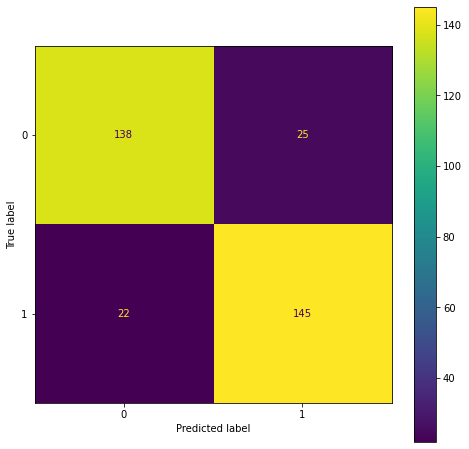

In [43]:
K = er_k.index(min(er_k))+1

KNN = KNeighborsClassifier(n_neighbors=K)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
disp_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp_cm.plot()
disp_cm.figure_.set_size_inches(8, 8, forward = True)
print(classification_report(y_test, y_pred))


# Great Job!